# Investigation into filter variances

#### Importing

In [1]:
%matplotlib widget
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
rng = np.random.default_rng()

from filterbank.components import Filterbank, TransmissionLine, ManifoldFilter, DirectionalFilter, BaseFilter

plt.style.use('~/Repos/louis-style-docs/default.mplstyle')

fig_path = "~/Repos/filterbank-performance/paper_dir_filter_figures/"


#### Settings

In [2]:
nF = int(2e4)
f = np.linspace(210e9,450e9,nF)

f0_single = 330e9

f0_min = 220e9
f0_max = 440e9

## Variances
sigma_Qc = 0. #0.10
sigma_f0 = 0. #0.085


Z0_res = 50.6
eps_eff_res = 28.8
Qi_res = 1800


Z0_thru = 80.4
eps_eff_thru = 29.7

TL_thru = TransmissionLine(Z0_thru,eps_eff_thru)

TL_res = TransmissionLine(Z0_res,eps_eff_res,Qi=np.inf)
TL_res_lossy = TransmissionLine(Z0_res,eps_eff_res,Qi=Qi_res)

TransmissionLinesDict = {
    'through' : TL_thru,
    'resonator' : TL_res,
    'MKID' : TL_thru
}

TransmissionLinesLossyDict = {
    'through' : TL_thru,
    'resonator' : TL_res_lossy,
    'MKID' : TL_thru
}



#### Generate numerical models

In [3]:
#-----------------------------
single_filter_MF = ManifoldFilter(
    f0=f0_single,
    Ql=500,
    TransmissionLines=TransmissionLinesDict,
    compensate=False
)
single_filter_MF.S(f)
single_filter_MF.realized_parameters()

single_filter_DF = DirectionalFilter(
    f0=f0_single,
    Ql=500,
    TransmissionLines=TransmissionLinesDict,
    compensate=False
)
single_filter_DF.S(f)
single_filter_DF.realized_parameters()
#-----------------------------



#-----------------------------
## Manifold filter, no variance
FB_MF_no_variance = Filterbank(
    FilterClass=ManifoldFilter,
    TransmissionLines=TransmissionLinesDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=0,
    sigma_Qc=0,
    compensate=False
)
FB_MF_no_variance.S(f)
FB_MF_no_variance.realized_parameters()

## Manifold filter, variance
FB_MF_variance = Filterbank(
    FilterClass=ManifoldFilter,
    TransmissionLines=TransmissionLinesLossyDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=sigma_f0,
    sigma_Qc=sigma_Qc,
    compensate=False
)
FB_MF_variance.S(f)
FB_MF_variance.realized_parameters()
#-----------------------------



#-----------------------------
## Directional filter, no variance
FB_DF_no_variance = Filterbank(
    FilterClass=DirectionalFilter,
    TransmissionLines=TransmissionLinesDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=0,
    sigma_Qc=0,
    compensate=False
)
FB_DF_no_variance.S(f)
FB_DF_no_variance.realized_parameters()

## Directional filter, variance
FB_DF_variance = Filterbank(
    FilterClass=DirectionalFilter,
    TransmissionLines=TransmissionLinesLossyDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=sigma_f0,
    sigma_Qc=sigma_Qc,
    compensate=False
)
FB_DF_variance.S(f)
FB_DF_variance.realized_parameters()
#-----------------------------

(array([4.39187373e+11, 4.38263371e+11, 4.37375368e+11, 4.36499366e+11,
        4.35623364e+11, 4.34759362e+11, 4.33894760e+11, 4.33019358e+11,
        4.32155355e+11, 4.31302753e+11, 4.30438751e+11, 4.29575349e+11,
        4.28722747e+11, 4.27870745e+11, 4.27018743e+11, 4.26166740e+11,
        4.25314738e+11, 4.24462736e+11, 4.23622734e+11, 4.22770732e+11,
        4.21930730e+11, 4.21090728e+11, 4.20250726e+11, 4.19410724e+11,
        4.18570721e+11, 4.17742119e+11, 4.16902717e+11, 4.16074115e+11,
        4.15246113e+11, 4.14418111e+11, 4.13590109e+11, 4.12762107e+11,
        4.11934105e+11, 4.11118103e+11, 4.10301501e+11, 4.09474099e+11,
        4.08658097e+11, 4.07842095e+11, 4.07026093e+11, 4.06221491e+11,
        4.05406089e+11, 4.04601487e+11, 4.03786084e+11, 4.02982082e+11,
        4.02178080e+11, 4.01374078e+11, 4.00581476e+11, 3.99777474e+11,
        3.98973472e+11, 3.98181470e+11, 3.97389468e+11, 3.96597466e+11,
        3.95805465e+11, 3.95013463e+11, 3.94221461e+11, 3.934408

#### Plotting functions

In [4]:
def plot_centered():
    plot = plt.gcf()
    return plot.add_axes([0.18,0.15,0.64,0.75])

def plotstep_add_S_params(f, Filter: BaseFilter,ax: plt.Axes=None):
    if ax == None:
        ax = plt.gca()

    S_param_list = [
        Filter.S11_absSq,
        Filter.S21_absSq,
        Filter.S31_absSq
    ]

    if Filter.S41_absSq is not None:
        S_param_list.append(Filter.S41_absSq)

    return [line for Sii in S_param_list for line in ax.plot(f/1e9, Sii)]

def plotstep_percentage(lines):
    for line in lines:
        line.set_ydata(line.get_ydata()*100)
        line.axes.set_ylim(0,100)

def plotstep_dB(lines):
    for line in lines:
        line.set_ydata(10*np.log10(line.get_ydata()))
        line.axes.set_ylim(-30,0)

def plotstep_add_filterbank(f, FB: Filterbank, ax: plt.Axes=None):
    if ax == None:
        ax = plt.gca()

    S31_all = FB.S31_absSq_list

    #ax
    cmap = cm.get_cmap('rainbow').copy()
    norm = mpl.colors.Normalize(vmin=0, vmax=FB.n_filters)

    return [line for i,S31_absSq in enumerate(S31_all) for line in ax.plot(f/1e9,S31_absSq,color=cmap(norm(i)))]
    
def make_bins_from_max(x,y,binwidth=0.05):
    max_xy = np.max((np.max(np.abs(x)), np.max(np.abs(y))))
    binlim = (int(max_xy/binwidth) + 1) * binwidth
    return np.arange(-binlim, binlim + binwidth, binwidth)

def format_compact_grid(fig):
    for index,ax in enumerate(fig.axes):
        ss = ax.get_subplotspec()
        ax.sharey(fig.axes[0])
        ax.sharex(fig.axes[0])
        
        ax.tick_params(labelleft=ss.is_first_col())
        ax.tick_params(labelright=ss.is_last_col())
        ax.tick_params(labelbottom=ss.is_last_row())
        ax.tick_params(labeltop=ss.is_first_row())

def violinplot_pretty(ax,data,labels=None):
    vplot = ax.violinplot(data,showmedians=True)
    ax.yaxis.grid(True)
    ax.set_xticks([1,2],labels=labels)
    ax.tick_params(axis="x",which="minor",length=0)

    vplot["cmedians"].set_linewidth(2)
    vplot["cmedians"].set_color("C3")

    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for violin_patch, color in zip(vplot["bodies"],colors[:len(vplot["bodies"])]):
        violin_patch.set_facecolor(color)
        violin_patch.set_alpha(0.5)

#### Three section filter

In [5]:
from filterbank.components import Coupler
from filterbank.transformations import abcd_shuntload, Zin_from_abcd, chain
from filterbank.utils import res_variance
#f0,l_coup1,l_coup2,l_res
# 330.042715461097,34.1333712871258,28.1988775919869,53.2945188242358


class Resonator3Section:
    def __init__(self, f0, Ql, TransmissionLineRes : TransmissionLine, TransmissionLineBar : TransmissionLine, Z_termination, sigma_f0=0, sigma_Qc=0) -> None:
        self.f0, self.Ql = (f0, Ql)
        _    , Ql_C1 = res_variance(f0,Ql,TransmissionLineRes.Qi,sigma_f0,sigma_Qc)
        _    , Ql_C2 = res_variance(f0,Ql,TransmissionLineRes.Qi,sigma_f0,sigma_Qc)
        f0_L1, _     = res_variance(f0,Ql,TransmissionLineRes.Qi,sigma_f0,sigma_Qc)
        
        self.TransmissionLineBar1 = TransmissionLineBar
        self.TransmissionLineBar2 = TransmissionLineBar
        self.TransmissionLineRes = TransmissionLineRes

        assert len(np.atleast_1d(Z_termination)) < 3, "Z_termination has too many components (max 2 components)"
        self.Z_termination = np.atleast_1d(Z_termination)

        self.Coupler1 = Coupler(f0=self.f0,Ql=Ql_C1,Z_termination=[self.TransmissionLineBar1.Z0, self.Z_termination[0]],Qi=self.TransmissionLineBar1.Qi)

        self.Coupler2 = Coupler(f0=self.f0,Ql=Ql_C2,Z_termination=[self.TransmissionLineBar2.Z0, self.Z_termination[-1]],Qi=self.TransmissionLineBar1.Qi)

        self.l_bar1 = 34.13e-6/2
        self.l_bar2 = 28.20e-6/2
        self.l_res = 52.39e-6


    def resonator_length(self):
        return self.l_res + self.l_bar1 + self.l_bar2 

    def ABCD(self,f):
        ABCD = chain(
                        self.Coupler1.ABCD(f), 
                        self.TransmissionLineBar1.ABCD(f,self.l_bar1),
                        self.TransmissionLineRes.ABCD(f,self.l_res),
                        self.TransmissionLineBar2.ABCD(f,self.l_bar2),
                        self.Coupler2.ABCD(f)
                    )
        
        return ABCD

class ManifoldFilter3Section(BaseFilter):
    def __init__(self, f0, Ql, TransmissionLines: dict, sigma_f0=0, sigma_Qc=0, compensate=True) -> None:
        super().__init__(f0, Ql, TransmissionLines)
        self.TransmissionLine_bar = TransmissionLines['coupler']

        if compensate == True:
            self.Ql = Ql * 1.15
        else:
            self.Ql = Ql

        self.Resonator = Resonator3Section(
            f0 = self.f0, 
            Ql = self.Ql, 
            TransmissionLineRes = self.TransmissionLine_resonator,
            TransmissionLineBar = self.TransmissionLine_bar,
            Z_termination = [self.TransmissionLine_through.Z0/2, self.TransmissionLine_MKID.Z0], 
            sigma_f0 = sigma_f0, 
            sigma_Qc = sigma_Qc
        )

    def ABCD(self, f):
        ABCD = abcd_shuntload(
            Zin_from_abcd(self.Resonator.ABCD(f),self.TransmissionLine_MKID.Z0)
        )
        
        return ABCD
    
    def ABCD_to_MKID(self, f, ABCD_to_termination):
        ABCD_shunt_termination = self.ABCD_shunt_termination(f, ABCD_to_termination)

        ABCD_to_MKID = chain(
            ABCD_shunt_termination,
            self.Resonator.ABCD(f)
        )
        
        return (ABCD_to_MKID,)

# Iteration of single filters

manifold.Resonator.l_res=8.31e-05
manifold.Resonator.Coupler1.C=3.24e-16
manifold.Resonator.TransmissionLine.eps_eff=28.8
manifold.Resonator.TransmissionLine.Z0=50.6
manifold.Resonator.TransmissionLine.Qi=1200

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


/Users/louism/Repos/filterbank-performance/.venv/lib/python3.11/site-packages/numpy/polynomial/polyutils.py:303: RuntimeWarning: divide by zero encountered in scalar divide
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/louism/Repos/filterbank-performance/.venv/lib/python3.11/site-packages/numpy/polynomial/polyutils.py:304: RuntimeWarning: divide by zero encountered in scalar divide
  scl = newlen/oldlen
/Users/louism/Repos/filterbank-performance/.venv/lib/python3.11/site-packages/numpy/polynomial/polyutils.py:372: RuntimeWarning: invalid value encountered in add
  return off + scl*x


LinAlgError: SVD did not converge in Linear Least Squares

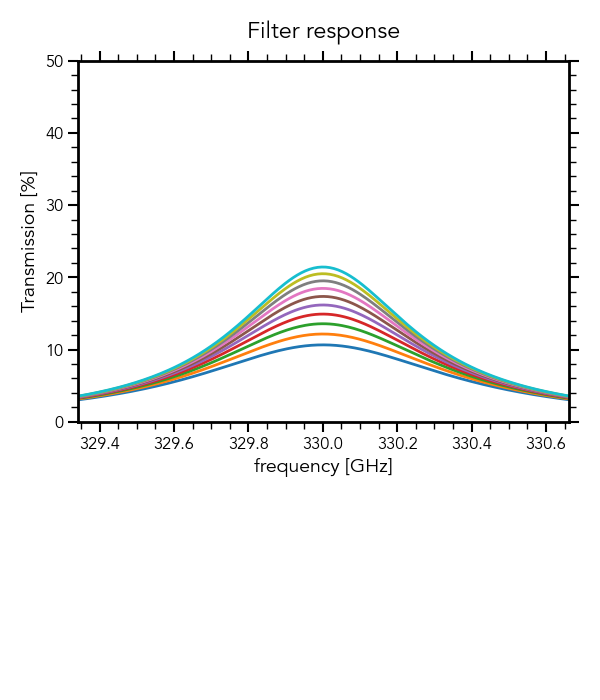

In [8]:
def lognormal(mean=0.0, sigma=1.0, size=None):
    rng = np.random.default_rng()
    E_x = mean
    VAR_x = sigma**2

    mu_log = np.log(E_x/( np.sqrt( VAR_x / (E_x**2) + 1 ) ))
    sigma_log = np.sqrt( np.log( VAR_x / (E_x**2) + 1 ) )

    return rng.lognormal(mu_log,sigma_log,size)

def get_sensitivity(x,y,domain=None) -> Polynomial:
    return Polynomial.fit(x,y,deg=1,domain=domain)


f = np.linspace(270e9,380e9,nF)

plt.close("all")
f0_res = 330e9
Ql_res = 500
Qi_res = 1200
std_Qc = 0.
std_f0 = 0.

n_runs = 100

std_l_res = 5e-3
std_C_coup = 0
std_eps_eff = 1e-2
std_Z0 = 5e-2
std_Qi = 0.4

TL_res_single = TransmissionLine(Z0_res,eps_eff_res,Qi=Qi_res)

TransmissionLinesResDict = {
    'through' : TL_thru,
    'resonator' : TL_res_single,
    'MKID' : TL_thru
}

manifold = ManifoldFilter(
    f0=f0_res,
    Ql=Ql_res,
    TransmissionLines=TransmissionLinesResDict,
    sigma_f0=std_f0,
    sigma_Qc=std_Qc,
    compensate=False
)

l_res = np.linspace(manifold.Resonator.l_res*(1-std_l_res),manifold.Resonator.l_res*(1+std_l_res),n_runs)
C_coup_1 = np.linspace(manifold.Resonator.Coupler1.C*(1-std_C_coup)*1,manifold.Resonator.Coupler1.C*(1+std_C_coup)*1,n_runs)
C_coup_2 = np.linspace(manifold.Resonator.Coupler2.C*(1-std_C_coup)*1,manifold.Resonator.Coupler2.C*(1+std_C_coup)*1,n_runs)
eps_eff = np.linspace(eps_eff_res*(1-std_eps_eff),eps_eff_res*(1+std_eps_eff),n_runs)
Z0 = np.linspace(manifold.Resonator.TransmissionLine.Z0*(1-std_Z0),manifold.Resonator.TransmissionLine.Z0*(1+std_Z0),n_runs)
Qi = np.linspace(manifold.Resonator.TransmissionLine.Qi*(1-std_Qi),manifold.Resonator.TransmissionLine.Qi*(1+std_Qi),n_runs)

print(f"{manifold.Resonator.l_res=:.2e}")
print(f"{manifold.Resonator.Coupler1.C=:.2e}")
print(f"{manifold.Resonator.TransmissionLine.eps_eff=}")
print(f"{manifold.Resonator.TransmissionLine.Z0=}")
print(f"{manifold.Resonator.TransmissionLine.Qi=}")
print("")


fig = plt.figure(figsize=(6,7))
colors = ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
lim = (-1,1)
gs = fig.add_gridspec(2,2,height_ratios=[2,1])
ax = fig.add_subplot(gs[0, :])

f0_realized = np.empty(n_runs)
Ql_realized = np.empty(n_runs)
lines = []

for i in range(n_runs):
    TL_res_single = TransmissionLine(Z0_res,eps_eff_res,Qi=Qi_res)

    TransmissionLinesResDict = {
        'through' : TL_thru,
        'resonator' : TL_res_single,
        'MKID' : TL_thru
    }

    manifold = ManifoldFilter(
        f0=f0_res,
        Ql=Ql_res,
        TransmissionLines=TransmissionLinesResDict,
        sigma_f0=std_f0,
        sigma_Qc=std_Qc,
        compensate=False
    )

    # manifold.Resonator.l_res = l_res[i]
    
    # manifold.Resonator.Coupler1.C = C_coup_1[i]
    # manifold.Resonator.Coupler2.C = C_coup_2[i]

    # manifold.Resonator.TransmissionLine.eps_eff = eps_eff[i]
    
    # manifold.Resonator.TransmissionLine.Z0 = Z0[i]
    
    manifold.Resonator.TransmissionLine.Qi = Qi[i]
    

    manifold.S(f)
    f0_realized[i], Ql_realized[i] = manifold.realized_parameters()
    
    if i % 10 == 0: #plot a few of many filters
        S31_absSq = manifold.S31_absSq
        lines += ax.plot(f/1e9,S31_absSq,color=colors[(i//10)%10])

plotstep_percentage(lines)

ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Transmission [%]')  # Add a y-label to the axes.
ax.set_ylim(0,50)
ax.set_xlim((np.mean(f0_realized)+lim[0]*f0_res/Ql_res)/1e9,(np.mean(f0_realized)+lim[-1]*f0_res/Ql_res)/1e9)
ax.set_title("Filter response")  # Add a title to the axes.


def plot_param(ax,param,y):
    ax.scatter(param,y)
    

def calc_plot_sensitivity(param,variance):

    #-------------- calculate df0, dQl -----------

    df_norm = f0_res/Ql_res
    df0_res = (f0_realized-f0_res)/df_norm

    f0_svty = get_sensitivity(param,df0_res)
    print(f"f0 sensitivity: {f0_svty.coef[1]:5.2%} for a {variance:5.2%} variance")

    dQl_res = (Ql_realized-Ql_res)/Ql_res

    Ql_svty = get_sensitivity(param,dQl_res)
    print(f"Ql sensitivity: {Ql_svty.coef[1]:5.2%} for a {variance:5.2%} variance")

    #-----------------------------------
    ax_f0 = fig.add_subplot(gs[1, 0])
    # ax_f0.tick_params(labelleft=False,labelright=True)

    # bins = make_bins_from_max(df0_res,dQl_res,binwidth=0.05)

    plot_param(ax_f0,param,df0_res)
    x,y = f0_svty.linspace(n_runs)
    ax_f0.plot(x,y,color="C1")
    ax_f0.set_ylabel(r"$\Delta f_0^{var}$")
    ax_f0.set_title(r"$(f_0^{var} - f_0)/\Delta f_0$")
    # ax_f0.annotate(
    #     fr"""$\mu = {np.mean(df0_res):.2f}$
    # $\sigma = {np.std(df0_res):.2f}$""",xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, horizontalalignment='left', verticalalignment='top')
    # ax_f0.set_xlim(lim+(np.mean(f0_realized)-f0_res)/df_norm)


    ax_Ql = fig.add_subplot(gs[1, 1])

    plot_param(ax_Ql,param,dQl_res)
    x,y = Ql_svty.linspace(n_runs)
    ax_Ql.plot(x,y,color="C1")
    ax_Ql.tick_params(labelleft=False,labelright=True)
    ax_Ql.set_ylabel(r'$\Delta Q_l^{var}$')
    ax_Ql.set_title(r"$(Q_l^{var} - Q_l)/Q_l$")
    # ax_Ql.annotate(
    #     fr"""$\mu = {np.mean(dQl_res):.2f}$
    # $\sigma = {np.std(dQl_res):.2f}$""",xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, horizontalalignment='left', verticalalignment='top')

    # ax_Ql.hist(dQl_res,bins=bins)
    # ax_Ql.set_xlim(lim+(np.mean(Ql_realized)-Ql_res)/Ql_res)

calc_plot_sensitivity(C_coup_1,std_C_coup)


f0 sensitivity: -0.00% for a 20.00% variance
Ql sensitivity: 17.09% for a 20.00% variance


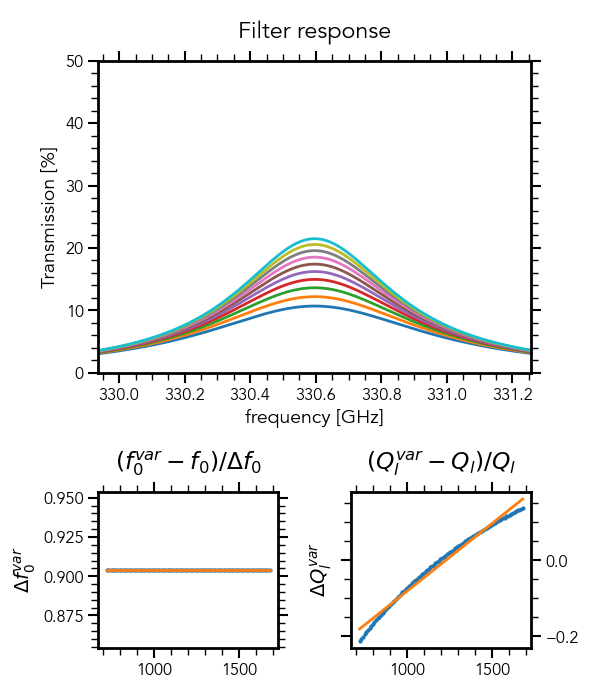

In [15]:
def lognormal(mean=0.0, sigma=1.0, size=None):
    rng = np.random.default_rng()
    E_x = mean
    VAR_x = sigma**2

    mu_log = np.log(E_x/( np.sqrt( VAR_x / (E_x**2) + 1 ) ))
    sigma_log = np.sqrt( np.log( VAR_x / (E_x**2) + 1 ) )

    return rng.lognormal(mu_log,sigma_log,size)

def get_sensitivity(x,y,domain=None) -> Polynomial:
    return Polynomial.fit(x,y,deg=1,domain=domain)


f = np.linspace(270e9,380e9,nF)

plt.close("all")
f0_res = 330e9
Ql_res = 500
Qi_res = 1200
std_Qc = 0.
std_f0 = 0.

n_runs = 100

std_l_res = 5e-3
std_C_coup = 0.0
std_eps_eff = 1e-2
std_Z0 = 2.5e-3
std_Qi = 0.2

TL_res_single = TransmissionLine(Z0_res,eps_eff_res,Qi=Qi_res)
TL_res_coup = TransmissionLine(Z0_res,eps_eff_res*0.96,Qi=Qi_res)

TransmissionLinesResDict = {
    'through' : TL_thru,
    'coupler' : TL_res_coup,
    'resonator' : TL_res_single,
    'MKID' : TL_thru
}

manifold = ManifoldFilter3Section(
    f0=f0_res,
    Ql=Ql_res,
    TransmissionLines=TransmissionLinesResDict,
    sigma_f0=std_f0,
    sigma_Qc=std_Qc,
    compensate=False
)

Z0 = np.linspace(manifold.Resonator.TransmissionLineRes.Z0*(1-std_Z0),manifold.Resonator.TransmissionLineRes.Z0*(1+std_Z0),n_runs)
Z0_bar1 = np.linspace(manifold.Resonator.TransmissionLineBar1.Z0*(1-std_Z0),manifold.Resonator.TransmissionLineBar1.Z0*(1+std_Z0),n_runs)
Z0_bar2 = np.linspace(manifold.Resonator.TransmissionLineBar2.Z0*(1-std_Z0),manifold.Resonator.TransmissionLineBar2.Z0*(1+std_Z0),n_runs)

C_coup_1 = np.linspace(manifold.Resonator.Coupler1.C*(1-std_C_coup),manifold.Resonator.Coupler1.C*(1+std_C_coup),n_runs)
C_coup_2 = np.linspace(manifold.Resonator.Coupler2.C*(1-std_C_coup),manifold.Resonator.Coupler2.C*(1+std_C_coup),n_runs)

fig = plt.figure(figsize=(6,7))
colors = ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
lim = (-1,1)
gs = fig.add_gridspec(2,2,height_ratios=[2,1])
ax = fig.add_subplot(gs[0, :])

f0_realized = np.empty(n_runs)
Ql_realized = np.empty(n_runs)
lines = []

for i in range(n_runs):
    TL_res_single = TransmissionLine(Z0_res,eps_eff_res,Qi=Qi_res)
    TL_res_coup = TransmissionLine(Z0_res,eps_eff_res*0.96,Qi=Qi_res)

    TransmissionLinesResDict = {
        'through' : TL_thru,
        'coupler' : TL_res_coup,
        'resonator' : TL_res_single,
        'MKID' : TL_thru
    }

    manifold = ManifoldFilter3Section(
        f0=f0_res,
        Ql=Ql_res,
        TransmissionLines=TransmissionLinesResDict,
        sigma_f0=std_f0,
        sigma_Qc=std_Qc,
        compensate=False
    )

    # manifold.Resonator.l_res = l_res[i]
    
    manifold.Resonator.Coupler1.C = C_coup_1[i]
    manifold.Resonator.Coupler2.C = C_coup_2[i]

    # manifold.Resonator.TransmissionLine.eps_eff = eps_eff[i]
    
    # manifold.Resonator.TransmissionLineRes.Z0 = Z0[i]
    # manifold.Resonator.TransmissionLineBar1.Z0 = Z0_bar1[i]
    # manifold.Resonator.TransmissionLineBar2.Z0 = Z0_bar2[i]
    
    manifold.Resonator.TransmissionLineRes.Qi = Qi[i]
    manifold.Resonator.TransmissionLineBar1.Qi = Qi[i]
    manifold.Resonator.TransmissionLineBar2.Qi = Qi[i]
    

    manifold.S(f)
    f0_realized[i], Ql_realized[i] = manifold.realized_parameters()
    
    if i % 10 == 0: #plot a few of many filters
        S31_absSq = manifold.S31_absSq
        lines += ax.plot(f/1e9,S31_absSq,color=colors[(i//10)%10])

plotstep_percentage(lines)

ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Transmission [%]')  # Add a y-label to the axes.
ax.set_ylim(0,50)
ax.set_xlim((np.mean(f0_realized)+lim[0]*f0_res/Ql_res)/1e9,(np.mean(f0_realized)+lim[-1]*f0_res/Ql_res)/1e9)
ax.set_title("Filter response")  # Add a title to the axes.


def plot_param(ax,param,y):
    ax.scatter(param,y)
    

def calc_plot_sensitivity(param,variance):

    #-------------- calculate df0, dQl -----------

    df_norm = f0_res/Ql_res
    df0_res = (f0_realized-f0_res)/df_norm

    f0_svty = get_sensitivity(param,df0_res)
    print(f"f0 sensitivity: {f0_svty.coef[1]:5.2%} for a {variance:5.2%} variance")

    dQl_res = (Ql_realized-Ql_res)/Ql_res

    Ql_svty = get_sensitivity(param,dQl_res)
    print(f"Ql sensitivity: {Ql_svty.coef[1]:5.2%} for a {variance:5.2%} variance")

    #-----------------------------------
    ax_f0 = fig.add_subplot(gs[1, 0])
    # ax_f0.tick_params(labelleft=False,labelright=True)

    # bins = make_bins_from_max(df0_res,dQl_res,binwidth=0.05)

    plot_param(ax_f0,param,df0_res)
    x,y = f0_svty.linspace(n_runs)
    ax_f0.plot(x,y,color="C1")
    ax_f0.set_ylabel(r"$\Delta f_0^{var}$")
    ax_f0.set_title(r"$(f_0^{var} - f_0)/\Delta f_0$")
    # ax_f0.annotate(
    #     fr"""$\mu = {np.mean(df0_res):.2f}$
    # $\sigma = {np.std(df0_res):.2f}$""",xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, horizontalalignment='left', verticalalignment='top')
    # ax_f0.set_xlim(lim+(np.mean(f0_realized)-f0_res)/df_norm)


    ax_Ql = fig.add_subplot(gs[1, 1])

    plot_param(ax_Ql,param,dQl_res)
    x,y = Ql_svty.linspace(n_runs)
    ax_Ql.plot(x,y,color="C1")
    ax_Ql.tick_params(labelleft=False,labelright=True)
    ax_Ql.set_ylabel(r'$\Delta Q_l^{var}$')
    ax_Ql.set_title(r"$(Q_l^{var} - Q_l)/Q_l$")
    # ax_Ql.annotate(
    #     fr"""$\mu = {np.mean(dQl_res):.2f}$
    # $\sigma = {np.std(dQl_res):.2f}$""",xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, horizontalalignment='left', verticalalignment='top')

    # ax_Ql.hist(dQl_res,bins=bins)
    # ax_Ql.set_xlim(lim+(np.mean(Ql_realized)-Ql_res)/Ql_res)

calc_plot_sensitivity(Qi,std_Qi)


## Single filter numerical and analytical model

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot()

lines_DF = plotstep_add_S_params(f,single_filter_DF)
labels = [r'$|S_{11}|^2$',r'$|S_{21}|^2$',r'$|S_{31}|^2$']
lines = lines_DF

lines_MF = plotstep_add_S_params(f,single_filter_MF)
lines += lines_MF

plotstep_percentage(lines)

ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Transmission [%]')  # Add a y-label to the axes.
# ax.set_ylim(0,100)
ax.set_xlim((f0_single-2*f0_single/500)/1e9,(f0_single+2*f0_single/500)/1e9)
ax.set_title("Filter response")  # Add a title to the axes.
ax.legend(lines_DF,labels,loc="right",frameon=False);  # Add a legend.
savestr = fig_path + "single_filter_manifold.png"
# fig.savefig(fname=savestr)
fig.set_tight_layout(True)
plt.show()

## Filterbank

In [ ]:
fig = plt.figure(figsize=(14,5))
plt.rcParams['lines.linewidth'] = 1
gs = fig.add_gridspec(1,2,width_ratios=[4,1])

##### Filterbank plot, comparison
ax = fig.add_subplot(gs[0, 0])

lines_DF = plotstep_add_filterbank(f,FB_DF_no_variance)
lines = lines_DF

lines_MF = plotstep_add_filterbank(f,FB_MF_no_variance)
lines += lines_MF

for line in lines_MF:
    line.set_color("black")
    line.set_alpha(0.2)
    line.set_linewidth(2)

# Sum of filters
sum_filters = np.sum(FB_DF_no_variance.S31_absSq_list,axis=0)
lines += ax.plot(f/1e9,sum_filters,label='sum filters',color="0.2",linestyle="-",linewidth=0.4)


## highlight several individual filters
highlight_index = [25,55,90,143,190,260,310]

for index in highlight_index:
    lines += ax.plot(f/1e9,FB_DF_no_variance.S31_absSq_list[index],color="0.0",linewidth=2)


# Make in percentage
plotstep_percentage(lines)


## Highlight zoom section
f_zoom = np.array([327e9,333e9])

left, bottom, width, height = (f_zoom[0]/1e9, 0, (f_zoom[1]-f_zoom[0])/1e9,100)
rect = plt.Rectangle((left, bottom), width, height, facecolor="#17C", alpha=0.2,zorder=1000)

ax.add_patch(rect)


ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Transmission [%]')  # Add a y-label to the axes.
# ax.set_ylim(0,100)
ax.set_xlim(min(f)/1e9,max(f)/1e9)
ax.set_title("Filter response")  # Add a title to the axes.
# ax.legend(lines_DF,labels,loc="right",frameon=False);  # Add a legend.
## ----------------------------------


##### zoom in on section of filterbank
ax_zoom = fig.add_subplot(gs[0, 1],sharey=ax)
ax_zoom.tick_params(labelleft=False,labelright=True)

lines_DF = plotstep_add_filterbank(f,FB_DF_no_variance)
lines = lines_DF

for line in lines_DF:
    line.set_linewidth(1)

lines_MF = plotstep_add_filterbank(f,FB_MF_no_variance)
lines += lines_MF

for line in lines_MF:
    line.set_color("black")
    line.set_alpha(0.3)
    line.set_linewidth(1)


# highlight a filter in zoom in
lines += ax_zoom.plot(f/1e9,FB_DF_no_variance.S31_absSq_list[highlight_index[3]],color="0.0",linewidth=2)

# Sum of filters
sum_filters = np.sum(FB_DF_no_variance.S31_absSq_list,axis=0)
lines += ax_zoom.plot(f/1e9,sum_filters,label='sum filters',color="0.2",linestyle="-",linewidth=1)

plotstep_percentage(lines)

ax_zoom.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax_zoom.set_xlim(f_zoom[0]/1e9,f_zoom[1]/1e9)
ax_zoom.set_title("Filter response")  # Add a title to the axes.

# save and plot figure
savestr = fig_path + "filterbank_comparison.png"
# fig.savefig(fname=savestr)
fig.set_tight_layout(True)
plt.show()

## Scatterplot of f0 and Ql

In [ ]:
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(2,4,width_ratios=[3,1,2,2])

f0 = FB_DF_variance.f0
Ql = FB_DF_variance.Ql
f0_DF, Ql_DF, _, _, = FB_DF_variance.realized_parameters()
f0_MF, Ql_MF, _, _, = FB_MF_variance.realized_parameters()

df_norm = f0/Ql
df0_DF = (f0_DF-f0)/df_norm
df0_MF = (f0_MF-f0)/df_norm

dQl_DF = (Ql_DF-Ql)/Ql
dQl_MF = (Ql_MF-Ql)/Ql

# f0 --------------------------------------
ax = fig.add_subplot(gs[0,0])
ax.scatter(f0/1e9,df0_DF)
ax.scatter(f0/1e9,df0_MF)
ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('f0')  # Add a y-label to the axes.
ax.set_ylim(-1,1)

t_DF = ax.text(0.1, 0.9, fr"DF: $\mu$ : {np.mean(df0_DF):.3f} $\sigma$ : {np.std(df0_DF):.3f}",
            ha="left", va="center", size=10, transform=ax.transAxes,
            bbox=dict(boxstyle="square,pad=0.3",
                      fc="white", ec="grey", lw=1))
t_MF = ax.text(0.1, 0.1, fr"MF: $\mu$ : {np.mean(df0_MF):.3f} $\sigma$ : {np.std(df0_MF):.3f}",
            ha="left", va="center", size=10, transform=ax.transAxes,
            bbox=dict(boxstyle="square,pad=0.3",
                      fc="white", ec="grey", lw=1))

# Histogram
ax_hist = fig.add_subplot(gs[0,1],sharey=ax)

bins = make_bins_from_max(df0_DF,df0_MF,binwidth=0.04)
ax_hist.hist(df0_DF,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist.hist(df0_MF,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist.tick_params(labelleft=False)

# Boxplot
ax_boxplot = fig.add_subplot(gs[0,2],sharey=ax)

bplot = ax_boxplot.boxplot([df0_DF,df0_MF],patch_artist=True,medianprops={"color":"C3","linewidth":2})
ax_boxplot.yaxis.grid(True)
ax_boxplot.set_xticks([1,2],labels=["DF","MF"])
ax_boxplot.tick_params(labelleft=False)
ax_boxplot.tick_params(axis="x",which="minor",length=0)

colors = ["C0","C1"]
for box_patch, color in zip(bplot["boxes"],colors):
    box_patch.set_facecolor(color)
    box_patch.set_alpha(0.5)

# Violinplot
ax_violinplot = fig.add_subplot(gs[0,3],sharey=ax)
vplot = ax_violinplot.violinplot([df0_DF,df0_MF],showmedians=True)
ax_violinplot.yaxis.grid(True)
ax_violinplot.set_xticks([1,2],labels=["DF","MF"])
ax_violinplot.tick_params(labelleft=False)
ax_violinplot.tick_params(axis="x",which="minor",length=0)

vplot["cmedians"].set_linewidth(2)
vplot["cmedians"].set_color("C3")

for violin_patch, color in zip(vplot["bodies"],colors):
    violin_patch.set_facecolor(color)
    violin_patch.set_alpha(0.5)


#----------------------------------------------------------------------


# Ql --------------------------------------
ax = fig.add_subplot(gs[1,0])
ax.scatter(f0/1e9,dQl_DF)
ax.scatter(f0/1e9,dQl_MF)
ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Ql')  # Add a y-label to the axes.
ax.set_ylim(-1,1)

t_DF = ax.text(0.1, 0.9, fr"DF: $\mu$ : {np.mean(dQl_DF):.3f} $\sigma$ : {np.std(dQl_DF):.3f}",
            ha="left", va="center", size=10, transform=ax.transAxes,
            bbox=dict(boxstyle="square,pad=0.3",
                      fc="white", ec="grey", lw=1))
t_MF = ax.text(0.1, 0.1, fr"MF: $\mu$ : {np.mean(dQl_MF):.3f} $\sigma$ : {np.std(dQl_MF):.3f}",
            ha="left", va="center", size=10, transform=ax.transAxes,
            bbox=dict(boxstyle="square,pad=0.3",
                      fc="white", ec="grey", lw=1))

# Histogram
ax_hist = fig.add_subplot(gs[1,1],sharey=ax)

bins = make_bins_from_max(dQl_DF,dQl_MF,binwidth=0.04)
ax_hist.hist(dQl_DF,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist.hist(dQl_MF,orientation='horizontal',bins=bins,alpha=0.5)

ax_hist.tick_params(labelleft=False)


# Boxplot
ax_boxplot = fig.add_subplot(gs[1,2],sharey=ax)

bplot = ax_boxplot.boxplot([dQl_DF,dQl_MF],patch_artist=True,medianprops={"color":"C3","linewidth":2})
ax_boxplot.yaxis.grid(True)
ax_boxplot.set_xticks([1,2],labels=["DF","MF"])
ax_boxplot.tick_params(labelleft=False)
ax_boxplot.tick_params(axis="x",which="minor",length=0)

colors = ["C0","C1"]
for box_patch, color in zip(bplot["boxes"],colors):
    box_patch.set_facecolor(color)
    box_patch.set_alpha(0.5)

# Violinplot
ax_violinplot = fig.add_subplot(gs[1,3],sharey=ax)
ax_violinplot.tick_params(labelleft=False)
violinplot_pretty(ax_violinplot,[dQl_DF,dQl_MF],["DF","MF"])
# ax.set_ybound(lower=0)
# ax_hist.set_ylim(-0.7,0.3)

#-----------------------------------------------------------------------